# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [34]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\smoking_driking_dataset_Ver01.csv')

# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Nüchterner Blutzucker', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

# Anforderungen 4: Feature Engineering & Zeitreihen

Erstellen Sie mindestens 2 neue Features.

In [36]:
# Hinzufügen Feature 1 (Body-Mass-Index):

body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)


# Hinzufügen Feature 2 (Mittlerer arterieller Blutdruck):

MAD = dataset["Diastolischer Blutdruck"] + (( dataset["Systolischer Blutdruck"] - dataset["Diastolischer Blutdruck"] ) * 0.5)

dataset["Mittlerer arterieller Blutdruck"] = MAD

dataset["Mittlerer arterieller Blutdruck"].describe()

count    991346.000000
mean         99.242563
std          11.428969
min          49.500000
25%          91.000000
50%          99.000000
75%         106.000000
max         212.500000
Name: Mittlerer arterieller Blutdruck, dtype: float64

Untersuchen Sie die Korrelationen gesamthaft und graphisch für mindestens 2 Feature-Kombinationen.

In [37]:
# Features bereinigen:

    # Trinker 'Y' --> 1 & 'N' --> 0:

dataset['Trinker'] = dataset['Trinker'] == 'Y'
dataset['Trinker'] = dataset['Trinker'].astype(int)

    # Neue Spalten 'Mann' & 'Frau': 1 wenn true, 0 wenn false:

dataset['Mann'] = dataset['Geschlecht'] == 'Male'
dataset['Frau'] = dataset['Geschlecht'] == 'Female'

    # Format als Integer:

dataset['Mann'] = dataset['Mann'].astype(int)
dataset['Frau'] = dataset['Frau'].astype(int)
dataset['Trinker'] = dataset['Trinker'].astype(int)

    # Entfernen der ursprünglichen 'Geschlecht'-Spalte:

dataset = dataset.drop('Geschlecht', axis=1)

dataset.head()

,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,Diastolischer Blutdruck,...,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck,Mann,Frau
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,21.0,35.0,40.0,1.0,1,25.952,100.0,1,0
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,0.9,20.0,36.0,27.0,3.0,0,24.691,106.0,1,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,0.9,47.0,32.0,68.0,1.0,0,27.548,95.0,1,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.1,29.0,34.0,18.0,1.0,0,26.122,116.0,1,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,0.8,19.0,12.0,25.0,1.0,0,22.039,110.0,1,0


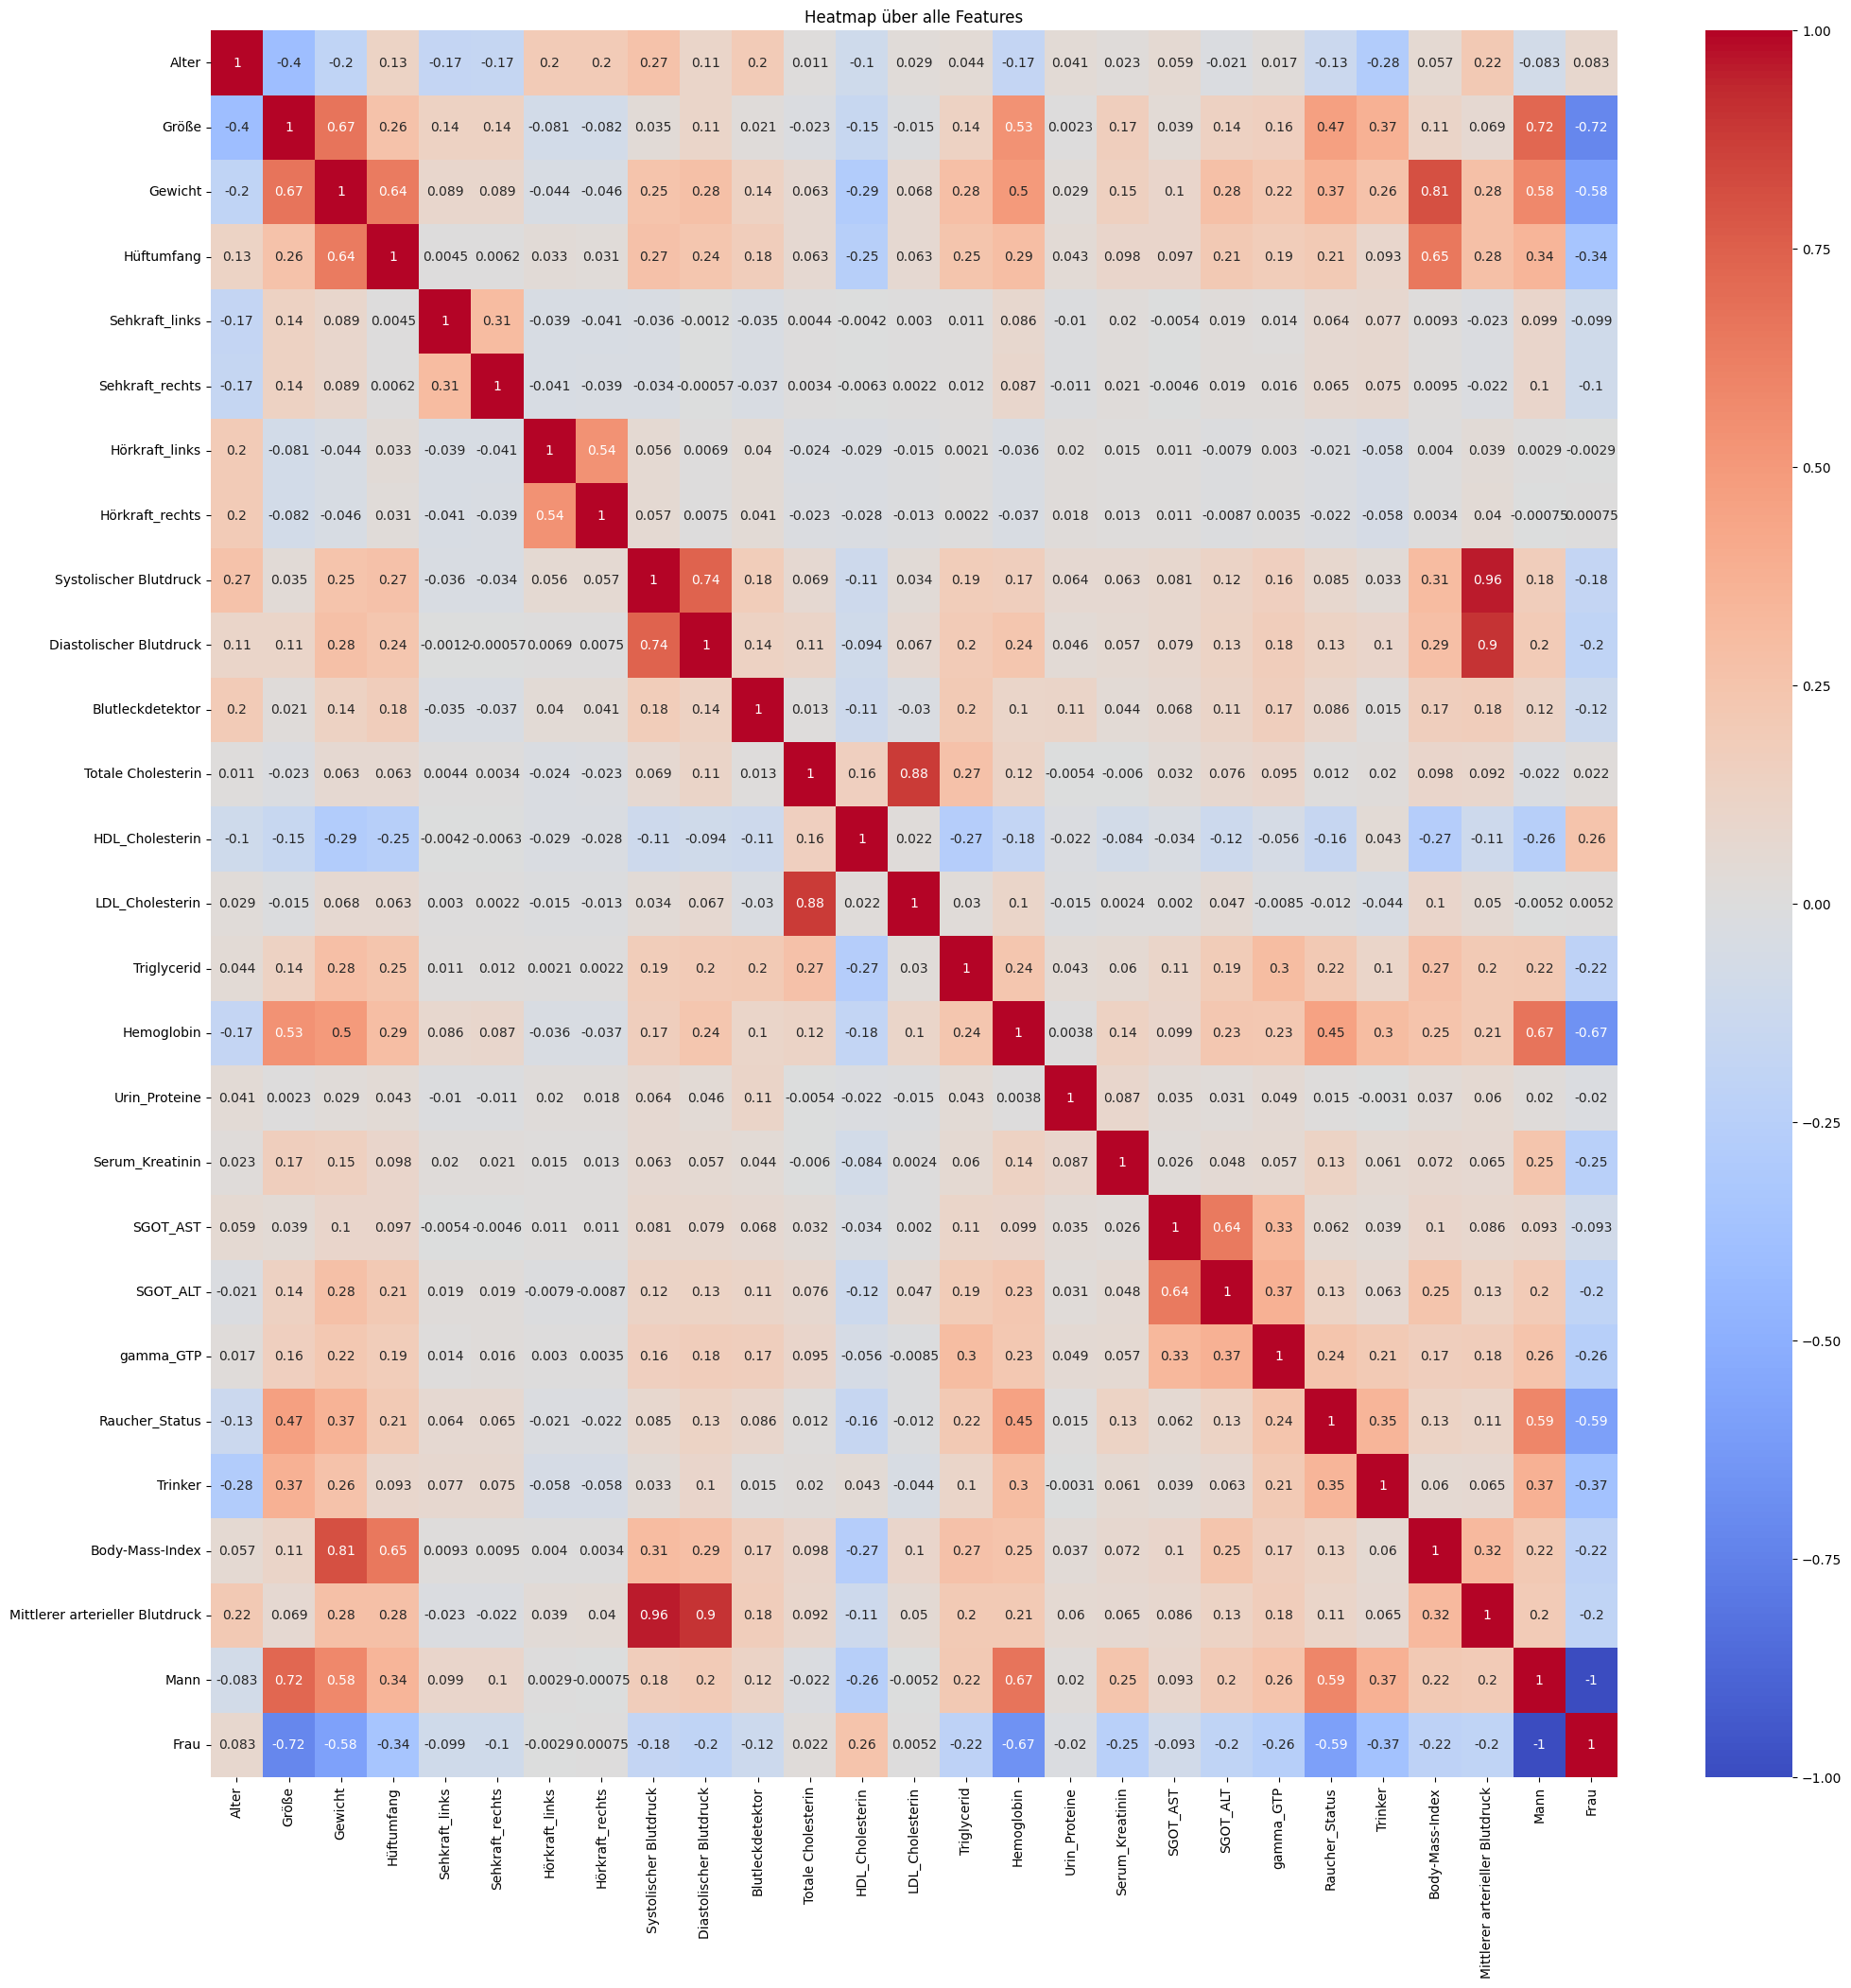

In [38]:
# Untersuchung der Korrelation aller Features in einer Heatmap:

plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.title('Heatmap über alle Features')
plt.show()

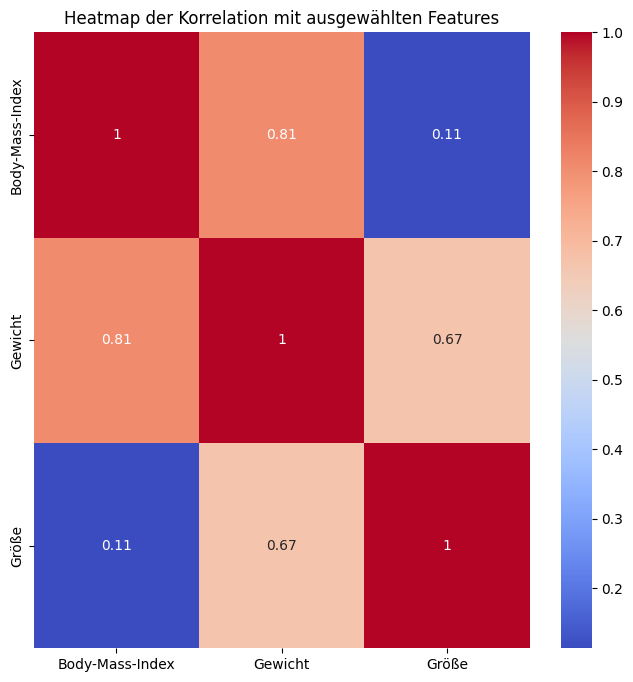

In [49]:
# Untersuchung der Korrelation mit weniger Features:

    # BMI, Gewicht, Größe:

plt.figure(figsize=(8, 8))
dataset1 = dataset[['Body-Mass-Index', 'Gewicht', 'Größe']]
heatmap = sns.heatmap(dataset1.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap der Korrelation mit ausgewählten Features')
plt.show()

In [40]:
""" 
Erkenntnisse:
 - Das Gewicht und der BMI korrelieren
 - Das Gewicht und die Größe korrelieren ebenso, aber schwächer
 - ...
"""

' \nErkenntnisse:\n - Das Gewicht und der BMI korrelieren\n - Das Gewicht und die Größe korrelieren ebenso, aber schwächer\n - ...\n'

Erstellen/Konvertieren Sie eine Time Series.

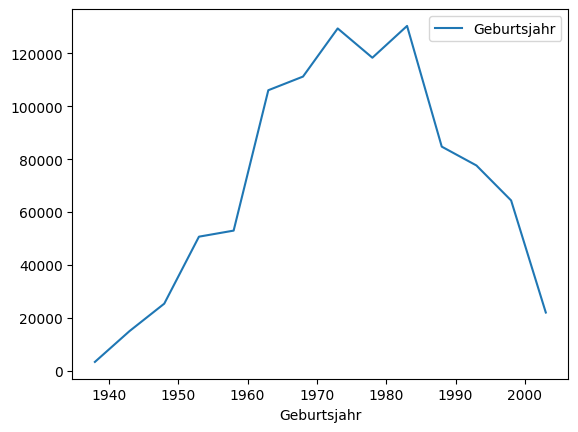

In [41]:
# Zeitreihe basierend auf dem Geburtsjahr erstellen:

dataset['Geburtsjahr'] = 2023 - dataset['Alter']

years = dataset.groupby('Geburtsjahr').agg({'Geburtsjahr':'count'})

years.plot()
plt.show()

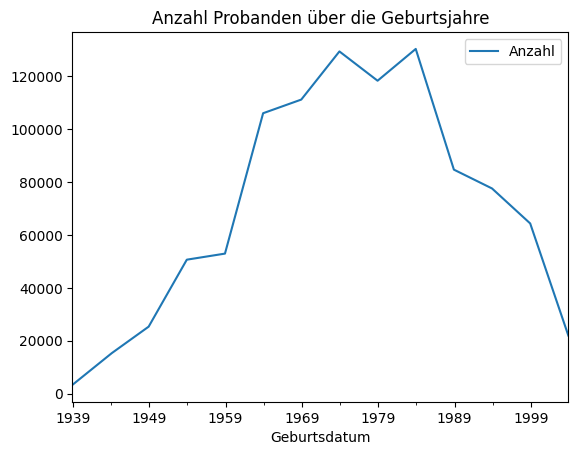

In [50]:
# Upsampling des Datasets auf Monatsebene, da wir das Geburtsjahr lediglich in 5-Jahres-Intervallen vorliegen haben:

    # Datumsspalte erstellen:

dataset['Geburtstag'] = '1231'
dataset['Geburtsdatum'] = dataset['Geburtsjahr'].astype(str) + dataset['Geburtstag']

dataset['Geburtsdatum'] = pd.to_datetime(dataset['Geburtsdatum'], format = '%Y%m%d')

dataset['Anzahl'] = 1

    # Lineares Resampling auf Monatsebene:

years = dataset.groupby('Geburtsdatum').agg({'Anzahl': 'count'})

years_upsampled = years.resample('M').asfreq().interpolate(method='linear')

years_upsampled.plot()
plt.title('Anzahl Probanden über die Geburtsjahre')
plt.show()

Erstellen Sie eine Analyse basierend auf den Zeitdaten.

Steigung : 82.14490452932871
y-Achsenabschnitt : 43169.032688107254


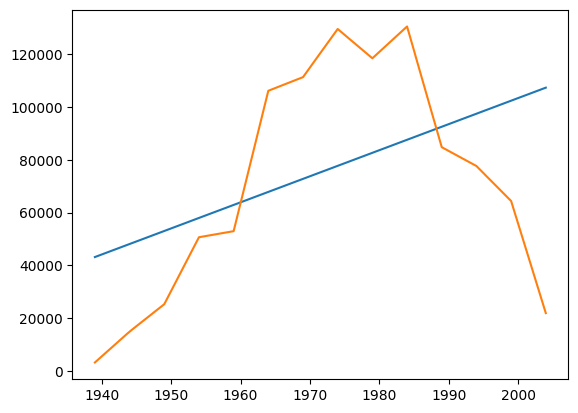

In [43]:
# Hinzufügen einer Trendlinie:

years = years_upsampled.reset_index()

x = np.arange(years['Geburtsdatum'].size)

fit = np.polyfit(x, years['Anzahl'], deg=1)
print ("Steigung : " + str(fit[0]))
print ("y-Achsenabschnitt : " + str(fit[1]))

fit_function = np.poly1d(fit)

plt.plot(years['Geburtsdatum'], fit_function(x))
plt.plot(years['Geburtsdatum'], years['Anzahl'])

plt.show()

In [44]:
# Stichpunkte zu Erkenntnissen aus der Zeitreihe:

# Leider ist diese Zeitreihe nicht am besten geeignet um eine Zeitreihenanalyse durchzuführen.
# Dennoch konnte ein Trend herausgeaerbeitet werden,der aufzeigt, dass die Probanden grundsätzlich mehr werden, 
#   je später sie geboren sind.
# Dieser Trend bricht jedoch gegen 1983 und die Anzahl wird geringer.
# Es wird deutlich, dass eine lineare Regression hier nicht das richtige Analyseinstrument ist. 

# Archiv

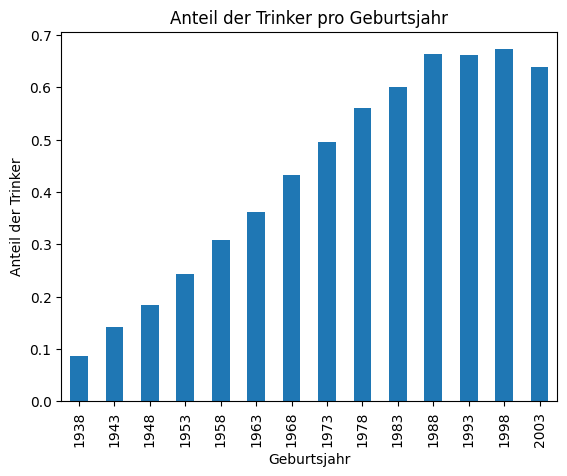

In [45]:
# Zusätzliche Analyse: Anteil Trinker je Alter

grouped = dataset.groupby('Geburtsjahr')['Trinker'].sum()

# Zählen Sie die Gesamtanzahl pro Geburtsjahr

total_by_year = dataset['Geburtsjahr'].value_counts()

# Berechnen Sie den Anteil der Trinker pro Geburtsjahr
anteil_trinker = grouped / total_by_year

# Erstellen Sie ein Balkendiagramm
anteil_trinker.plot(kind='bar', title='Anteil der Trinker pro Geburtsjahr')
plt.xlabel('Geburtsjahr')
plt.ylabel('Anteil der Trinker')
plt.show()

One Hot Encoding --> Einordung des Blutdrucks nach WHO
https://www.veroval.info/de-de/wissen/Blutdruck/wissenswertes-ueber-bluthochdruck

Laut WHO und anderer führender Gesundheitsorganisationen werden die systolischen und diastolischen Blutdruckwerte in sechs Kategorien1 unterteilt: optimal (bis zu 119 mmHg systolisch und bis zu 79 mmHg diastolisch), 
normal (120-129 mmHg systolisch und/oder 80-84 mmHg diastolisch), 
Grenzwert normal (130-139 mmHg systolisch und/oder 85-89 mmHg diastolisch), 
Hypertonie Grad 1 (140-159 mmHg systolisch und/oder 90-99 mmHg diastolisch), 
Hypertonie Grad 2 (160-179 mmHg systolisch und/oder 100-109 mmHg diastolisch) und 
Hypertonie Grad 3 (> 180 mmHg systolisch und/oder > 110 mmHg diastolisch).

In [46]:
dataset["BD_optimal"] = dataset['Systolischer Blutdruck']
dataset["BD_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Grenzwert_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 1"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 2"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 3"] = dataset['Systolischer Blutdruck']

In [47]:
dataset["BD_optimal"] = (dataset['Systolischer Blutdruck'] <= 119) & (dataset['Diastolischer Blutdruck'] <= 79)
dataset["BD_optimal"] = dataset["BD_optimal"].astype(int)

In [48]:
dataset["BD_normal"] = (dataset['Systolischer Blutdruck'] >= 120) & (dataset['Systolischer Blutdruck'] < 130) & (dataset['Diastolischer Blutdruck'] >= 80) & (dataset['Diastolischer Blutdruck'] < 85)
dataset["BD_normal"] = dataset["BD_normal"].astype(int) 

dataset["BD_Grenzwert_normal"] = (dataset['Systolischer Blutdruck'] >= 130) & (dataset['Systolischer Blutdruck'] < 140) & (dataset['Diastolischer Blutdruck'] >= 85) & (dataset['Diastolischer Blutdruck'] < 90)
dataset["BD_Grenzwert_normal"] = dataset["BD_Grenzwert_normal"].astype(int) 

dataset["BD_Hypertonie Grad 1"] = (dataset['Systolischer Blutdruck'] >= 140) & (dataset['Systolischer Blutdruck'] < 160) & (dataset['Diastolischer Blutdruck'] >= 90) & (dataset['Diastolischer Blutdruck'] < 100)
dataset["BD_Hypertonie Grad 1"] = dataset["BD_Hypertonie Grad 1"].astype(int) 

dataset["BD_Hypertonie Grad 2"] = (dataset['Systolischer Blutdruck'] >= 160) & (dataset['Systolischer Blutdruck'] < 180) & (dataset['Diastolischer Blutdruck'] >= 100) & (dataset['Diastolischer Blutdruck'] < 110)
dataset["BD_Hypertonie Grad 2"] = dataset["BD_Hypertonie Grad 2"].astype(int) 

dataset["BD_Hypertonie Grad 3"] = (dataset['Systolischer Blutdruck'] >= 180) & (dataset['Diastolischer Blutdruck'] >= 110)
dataset["BD_Hypertonie Grad 3"] = dataset["BD_Hypertonie Grad 3"].astype(int) 